# Descriptive Summary of Urban Areas

In this notebook, we produce summary maps in which we display descriptive summaries for each urban area across our study variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt 
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Processing

In [55]:
data = pd.read_csv('data/data.csv')

<ipython-input-55-e9bba6ebf1b5>:1: DtypeWarning:

Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.



In [56]:
data['Median Income (K)'] = data['Median Income'] / 1000

In [57]:
cols = ['CUHI_day_summer', 'CUHI_night_summer', 
        'SUHI_day_summer', 'SUHI_night_summer', 
        'Built Area (%)', 'Grass Area (%)', 'Tree Area (%)',  
        'Albedo_Built', 'Albedo_Grass', 'Albedo_Tree', 'DEM_urb_CT', 'Median Income (K)']

variables = ['CUHI Summer Daytime', 'CUHI Summer Nighttime', 
             'SUHI Summer Daytime', 'SUHI Summer Nighttime', 
             'Built Area (%)', 'Grass Area (%)', 'Tree Area (%)', 
             'Built Albedo', 'Grass Albedo', 'Tree Albedo', 'Elevation', 'Median Income (K)']

In [58]:
data.rename(columns=dict(zip(cols, variables)), inplace=True)

In [59]:
data.rename(columns={'Clim_zone': 'Climate Zone'}, inplace=True)

In [7]:
data.head()

system:index  AT_rur_day_summer  AT_rur_night_summer  \
0  00000000000000000132          34.924404            21.757747   
1  00000000000000000133          34.924404            21.757747   
2  00000000000000000134          34.924404            21.757747   
3  00000000000000000135          34.924404            21.757747   
4  00000000000000000323          34.924404            21.757747   

   AT_urb_day_CT_act_summer  AT_urb_day_all_summer  \
0                 35.112454              35.016955   
1                 34.978955              35.016955   
2                 34.925510              35.016955   
3                 35.190528              35.016955   
4                 35.108325              35.016955   

   AT_urb_night_CT_act_summer  AT_urb_night_all_summer    Albedo  \
0                   21.933739                 21.85244  0.214670   
1                   21.911980                 21.85244  0.221502   
2                   21.900347                 21.85244  0.217811   
3                   22.110893                 21.85244  0.235294   
4                   22.096334                 21.85244  0.215404   

   Built Albedo  Albedo_Built_all  Grass Albedo  Albedo_Grass_all  \
0      0.222724          0.227048      0.215284          0.204732   
1      0.248659          0.227048      0.208602          0.204732   
2      0.247611          0.227048      0.222031          0.204732   
3      0.243688          0.227048      0.217764          0.204732   
4      0.220232          0.227048      0.217527          0.204732   

   Tree Albedo  Albedo_Tree_all  Albedo_all          Area  Census_geoid  \
0     0.180942         0.173744    0.212203  3.612190e+06   48441011400   
1     0.164859         0.173744    0.212203  7.995815e+06   48441012200   
2     0.154968         0.173744    0.212203  1.301622e+06   48441012100   
3     0.189559         0.173744    0.212203  1.827807e+06   48441011900   
4     0.188800         0.173744    0.212203  2.746964e+06   48441012300   

      DEM_rur   Elevation  DEM_urb_CT_act  DEM_urb_all      ESABuilt  \
0  535.962751  531.262001      531.262001   533.762669  1.923120e+06   
1  535.962751  529.449501      532.223446   533.762669  1.598146e+06   
2  535.962751  531.698485      531.698485   533.762669  3.897641e+05   
3  535.962751  529.895505      529.895505   533.762669  9.567481e+05   
4  535.962751  538.201497      538.201497   533.762669  1.386262e+06   

   ESABuilt_all      ESAGrass  ESAGrass_all       ESATree   ESATree_all  \
0  4.970526e+07  3.074373e+05  4.279068e+07  7.771083e+05  2.264740e+07   
1  4.970526e+07  3.646100e+06  4.279068e+07  1.322474e+06  2.264740e+07   
2  4.970526e+07  5.920586e+05  4.279068e+07  2.398845e+05  2.264740e+07   
3  4.970526e+07  1.491961e+05  4.279068e+07  3.368867e+05  2.264740e+07   
4  4.970526e+07  4.748822e+05  4.279068e+07  4.949957e+05  2.264740e+07   

   LST_rur_day_summer  LST_rur_night_summer  LST_urb_day_CT_act_summer  \
0             41.7423             22.614651                  43.351823   
1             41.7423             22.614651                  41.693683   
2             41.7423             22.614651                  40.512643   
3             41.7423             22.614651                  43.857052   
4             41.7423             22.614651                  43.410609   

   LST_urb_day_all_summer  LST_urb_night_CT_act_summer  \
0               42.363243                    23.277403   
1               42.363243                    22.925598   
2               42.363243                    22.430844   
3               42.363243                    23.956061   
4               42.363243                    23.800659   

   LST_urb_night_all_summer  Urban_geoid   Urban_name  \
0                 22.962161          280  Abilene, TX   
1                 22.962161          280  Abilene, TX   
2                 22.962161          280  Abilene, TX   
3                 22.962161          280  Abilene, TX   
4                 22.962161          280  Abi

In [8]:
urban_df = pd.read_csv('data/Census_UHI_US_Urbanized_climzone_metadata.csv')

## Urban Summaries

In [9]:
summ_df = pd.DataFrame({
    'Tree Area (%)': data.groupby('Urban_name')['Tree Area (%)'].mean(),
    'CUHI Summer Day': data.groupby('Urban_name')['CUHI Summer Daytime'].mean(),
    'Grass Area (%)': data.groupby('Urban_name')['Grass Area (%)'].mean(),
    'Built Area (%)': data.groupby('Urban_name')['Built Area (%)'].mean(),
    'Albedo': data.groupby('Urban_name')['Albedo'].mean(), 
    'Tree Albedo': data.groupby('Urban_name')['Tree Albedo'].mean(),
    'Grass Albedo': data.groupby('Urban_name')['Grass Albedo'].mean(),
    'Built Albedo': data.groupby('Urban_name')['Built Albedo'].mean()
})
summ_df = summ_df.reset_index()
summ_df.head()

Urban_name  Tree Area (%)  CUHI Summer Day  \
0  Aberdeen--Bel Air South--Bel Air North, MD      58.457509         0.128149   
1                                 Abilene, TX      17.816113         0.141451   
2       Aguadilla--Isabela--San Sebastián, PR      61.285645         0.034279   
3                                   Akron, OH      54.649599         0.226669   
4                                  Albany, GA      62.539667         0.033413   

   Grass Area (%)  Built Area (%)    Albedo  Tree Albedo  Grass Albedo  \
0       16.474134       12.925111  0.161721     0.160044      0.185576   
1       28.445916       35.520523  0.210220     0.171388      0.208418   
2       16.650182       14.487306  0.217507     0.204207      0.211428   
3       19.315528       18.046045  0.169157     0.162853      0.183727   
4       14.995485       11.798425  0.172841     0.159844      0.191137   

   Built Albedo  
0      0.172420  
1      0.228308  
2      0.261853  
3      0.179070  
4      0.201827

In [10]:
summ_df = summ_df.merge(urban_df[['Urban_name', 'Clim_zone', 'Coastal?']], on='Urban_name')
summ_df.rename(columns={'Clim_zone': 'Climate Zone'}, inplace=True)
summ_df.head()

Urban_name  Tree Area (%)  CUHI Summer Day  \
0  Aberdeen--Bel Air South--Bel Air North, MD      58.457509         0.128149   
1                                 Abilene, TX      17.816113         0.141451   
2       Aguadilla--Isabela--San Sebastián, PR      61.285645         0.034279   
3                                   Akron, OH      54.649599         0.226669   
4                                  Albany, GA      62.539667         0.033413   

   Grass Area (%)  Built Area (%)    Albedo  Tree Albedo  Grass Albedo  \
0       16.474134       12.925111  0.161721     0.160044      0.185576   
1       28.445916       35.520523  0.210220     0.171388      0.208418   
2       16.650182       14.487306  0.217507     0.204207      0.211428   
3       19.315528       18.046045  0.169157     0.162853      0.183727   
4       14.995485       11.798425  0.172841     0.159844      0.191137   

   Built Albedo Climate Zone  Coastal?  
0      0.172420    Temperate      True  
1      0.228308    Temperate     False  
2      0.261853     Tropical      True  
3      0.179070         Snow     False  
4      0.201827    Temperate     False

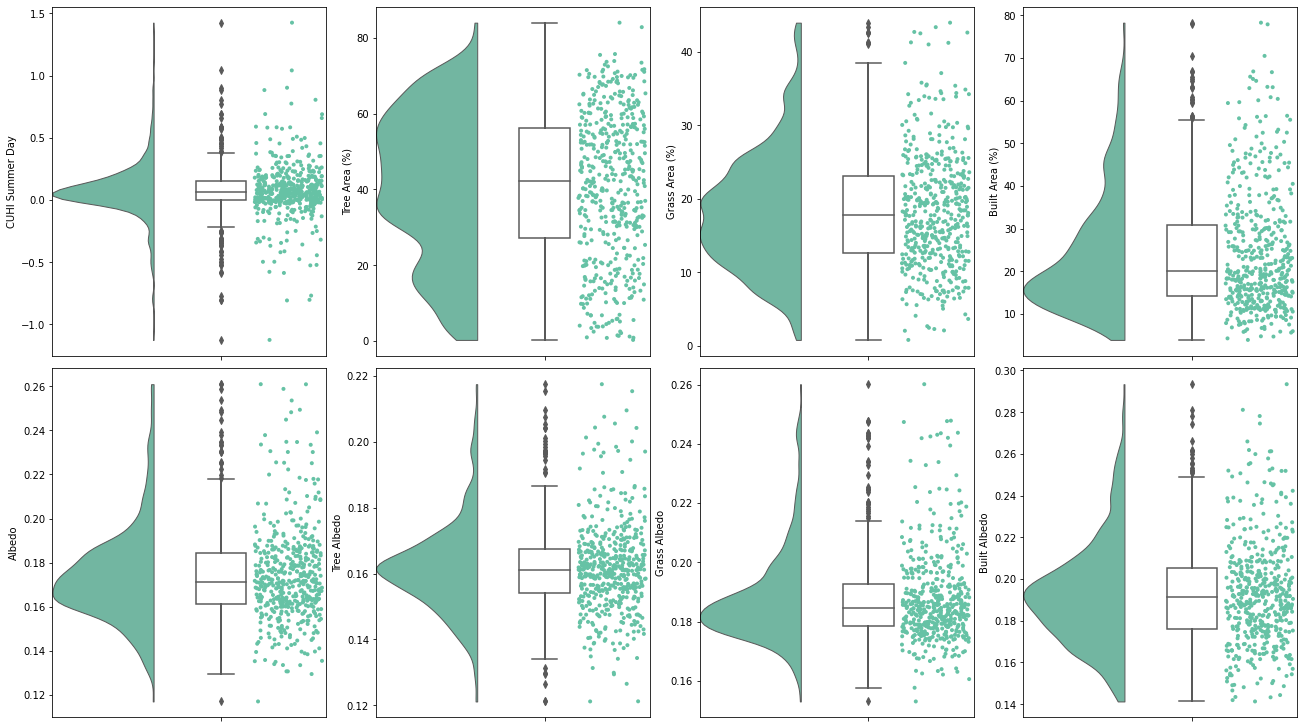

In [11]:
variables = ['CUHI Summer Day', 'Tree Area (%)', 'Grass Area (%)', 'Built Area (%)',
             'Albedo', 'Tree Albedo', 'Grass Albedo', 'Built Albedo']
plt.rcParams.update({'font.size': 16}) # Set font size to 15
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,10), constrained_layout=True)
for k, ax in enumerate(axes.flatten()):
    ax=pt.RainCloud(y = variables[k], data = summ_df, palette = "Set2", bw = 0.2,
                    width_viol = .6, ax = ax, orient = 'v', move = .2, point_size = 4)
    #ax.set_ylabel(variables[k], fontsize=16)
#plt.savefig('graphs/violin/descriptive/median_variables_city_violin.png', bbox_inches='tight', dpi=720)

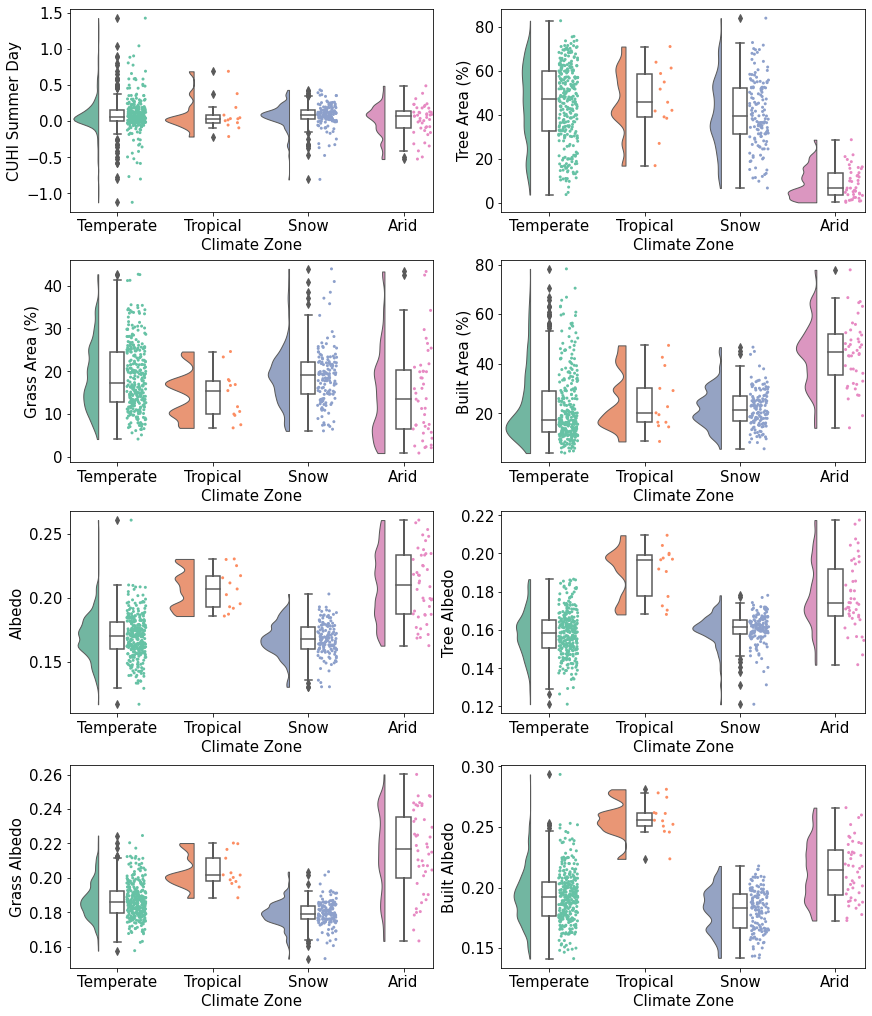

In [12]:
nrows = 4; ncols = 2; figsize = (12,14); pal = 'Set2'; sigma = 0.2; ort = 'v'; dx = 'Climate Zone'
plt.rcParams.update({'font.size': 15}) # Set font size to 15
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True)
for k, ax in enumerate(axes.flatten()):
    ax=pt.RainCloud(x = dx, y = variables[k], data = summ_df, palette = pal, bw = sigma,
                    width_viol = .6, ax = ax, orient = ort, move = .2, point_size = 3)
#plt.savefig(filename, bbox_inches='tight', dpi=720)

## Summary Maps

In [13]:
centroids = pd.read_csv('data/Centroids_USUHI.csv', usecols=['Lat','Lon','Urban_name'])

In [14]:
summ_df = summ_df.merge(centroids, on='Urban_name')

In [15]:
summ_df.head()

Urban_name  Tree Area (%)  CUHI Summer Day  \
0  Aberdeen--Bel Air South--Bel Air North, MD      58.457509         0.128149   
1                                 Abilene, TX      17.816113         0.141451   
2       Aguadilla--Isabela--San Sebastián, PR      61.285645         0.034279   
3                                   Akron, OH      54.649599         0.226669   
4                                  Albany, GA      62.539667         0.033413   

   Grass Area (%)  Built Area (%)    Albedo  Tree Albedo  Grass Albedo  \
0       16.474134       12.925111  0.161721     0.160044      0.185576   
1       28.445916       35.520523  0.210220     0.171388      0.208418   
2       16.650182       14.487306  0.217507     0.204207      0.211428   
3       19.315528       18.046045  0.169157     0.162853      0.183727   
4       14.995485       11.798425  0.172841     0.159844      0.191137   

   Built Albedo Climate Zone  Coastal?        Lat        Lon  
0      0.172420    Temperate      True  39.495446 -76.256233  
1      0.228308    Temperate     False  32.408586 -99.905154  
2      0.261853     Tropical      True  18.329905 -66.940474  
3      0.179070         Snow     False  41.089504 -81.532291  
4      0.201827    Temperate     False  31.636036 -84.177738

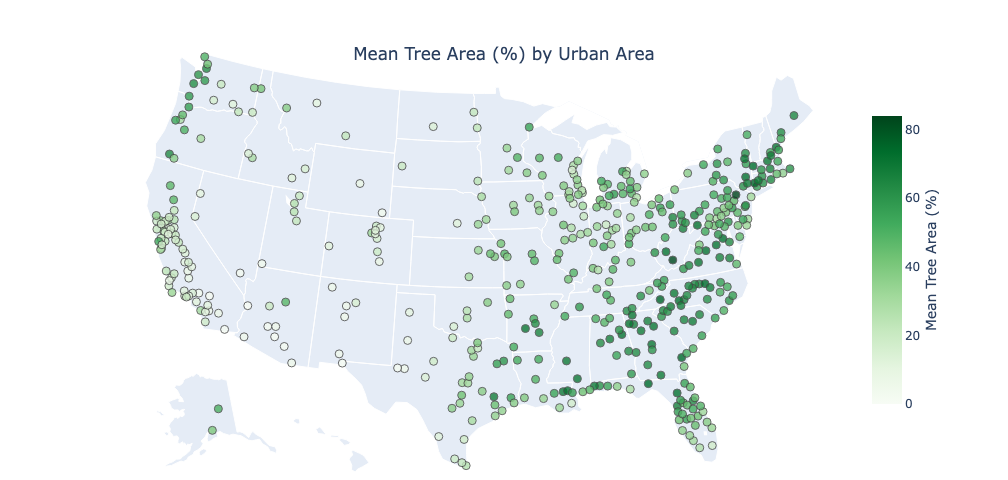

In [17]:
fig = go.Figure(data=go.Scattergeo(
        lon = summ_df['Lon'],
        lat = summ_df['Lat'],
        text = 'Mean Tree Area (%): ' + summ_df['Tree Area (%)'].round(2).astype(str)+'<br>'+ summ_df['Urban_name'],
        mode = 'markers',
        marker_color = summ_df['Tree Area (%)'],
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Greens',
            cmin = 0,
            color = summ_df['Tree Area (%)'],
            cmax = summ_df['Tree Area (%)'].max(),
            colorbar=dict(
                title=dict(
                    text="Mean Tree Area (%)", side='right'
                ),
                x=0.9, len=0.7           
            )
         )
))

fig.update_layout(
        title = 'Mean Tree Area (%) by Urban Area',
        title_x=0.5, title_y=0.90,
        geo_scope='usa',
        width=750,
        height=480,
        margin={'t':40,'l':0,'b':0,'r':50}
)
fig.show()

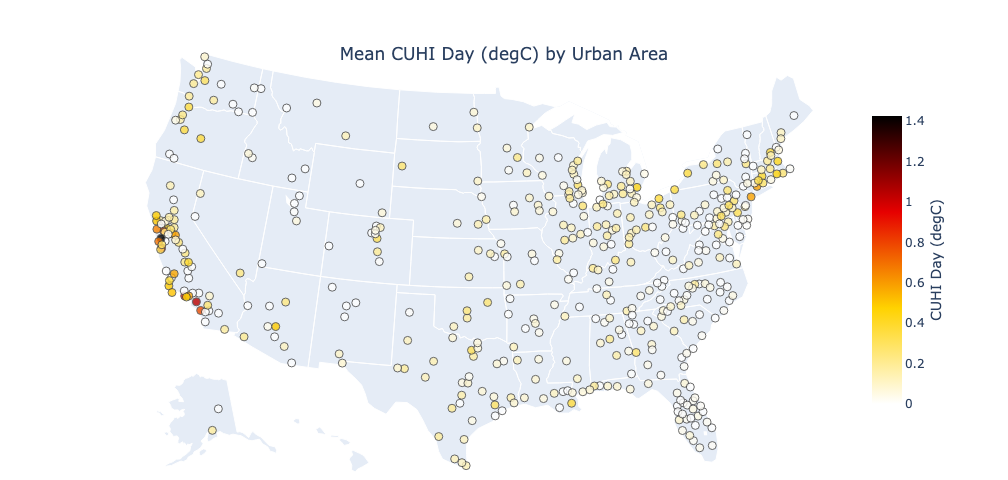

In [20]:
fig = go.Figure(data=go.Scattergeo(
        lon = summ_df['Lon'],
        lat = summ_df['Lat'],
        text = 'CUHI Day: ' + summ_df['CUHI Summer Day'].round(2).astype(str)+'<br>'+ summ_df['Urban_name'],
        mode = 'markers',
        marker_color = summ_df['CUHI Summer Day'],
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Hot',
            cmin = 0,
            color = summ_df['CUHI Summer Day'],
            cmax = summ_df['CUHI Summer Day'].max(),
            colorbar=dict(
                title=dict(
                    text="CUHI Day (degC)", side='right'
                ),
                x=0.9, len=0.7           
            )
         )
))

fig.update_layout(
        title = 'Mean CUHI Day (degC) by Urban Area',
        title_x=0.5, title_y=0.90,
        geo_scope='usa',
        width=750,
        height=480,
        margin={'t':40,'l':0,'b':0,'r':50}
    )
fig.show()

## Disparity Maps

### CUHI Day Disparity

In [21]:
base_q = pd.read_csv('tables/quartiles/baseline.csv')

In [24]:
base_q = base_q.merge(centroids, on='Urban_name')

In [25]:
base_q.head()

Urban_geoid       Urban_name  Clim_zone  Coastal?  CUHI Day (25th %tile)  \
0          280      Abilene, TX  Temperate     False               0.152695   
1          955       Albany, OR  Temperate     False               0.385044   
2         1171  Albuquerque, NM       Arid     False               0.442956   
3         1279   Alexandria, LA  Temperate     False               0.220852   
4         1765    Alton, IL--MO  Temperate     False               0.152590   

   CUHI Day (75th %tile)  CUHI Day (Difference)  CUHI Night (25th %tile)  \
0               0.049970               0.102725                 0.170664   
1              -0.024985               0.410029                 0.729594   
2              -0.305628               0.748584                 0.903729   
3              -0.084825               0.305676                 0.257233   
4              -0.122790               0.275379                 0.388192   

   CUHI Night (75th %tile)  CUHI Night (Difference)  SUHI Day (25th %tile)  \
0                -0.069281                 0.239945               0.663845   
1                -0.048602                 0.778196               3.763520   
2                 0.512427                 0.391302               1.128299   
3                -0.017049                 0.274282               2.807343   
4                -0.270974                 0.659166               1.677040   

   SUHI Day (75th %tile)  SUHI Day (Difference)  SUHI Night (25th %tile)  \
0               0.800015              -0.136170                 0.403856   
1              -0.689289               4.452808                 2.004197   
2               0.257445               0.870854                 1.527913   
3              -1.260104               4.067448                 0.583172   
4              -1.757762               3.434803                 0.975970   

   SUHI Night (75th %tile)  SUHI Night (Difference)        Lat         Lon  
0                 0.140264                 0.263592  32.408586  -99.905154  
1                 0.147296                 1.856902  44.645256 -123.088006  
2                 0.797699                 0.730213  35.391686 -106.772729  
3                -0.206620                 0.789792  31.304781  -92.425626  
4                -0.773880                 1.749850  38.969487  -90.158262

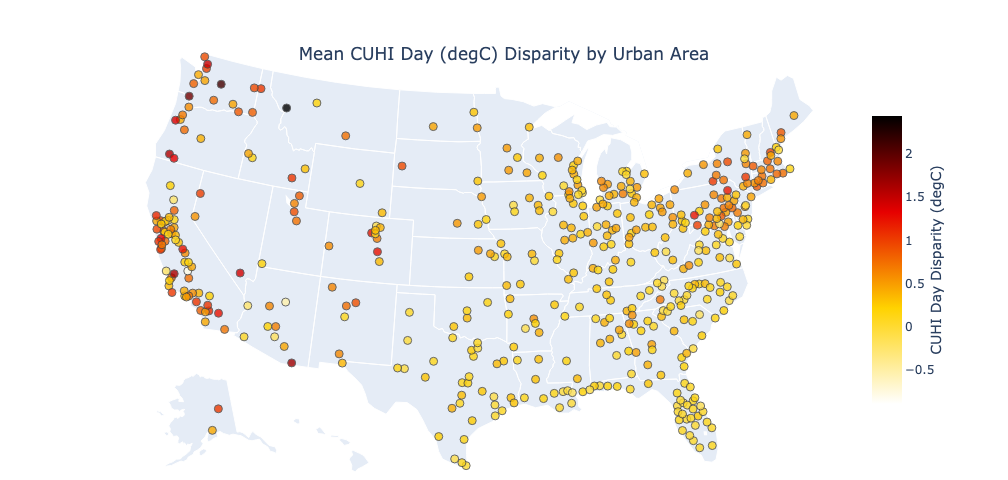

In [29]:
fig = go.Figure(data=go.Scattergeo(
        lon = base_q['Lon'],
        lat = base_q['Lat'],
        text = 'CUHI Day Difference: ' + base_q['CUHI Day (Difference)'].round(2).astype(str)+'<br>'+ base_q['Urban_name'],
        mode = 'markers',
        marker_color = base_q['CUHI Day (Difference)'],
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Hot',
            color = base_q['CUHI Day (Difference)'],
            cmin = base_q['CUHI Day (Difference)'].min(),
            cmax = base_q['CUHI Day (Difference)'].max(),
            colorbar=dict(
                title=dict(
                    text="CUHI Day Disparity (degC)", side='right'
                ),
                x=0.9, len=0.7           
            )
         )
))

fig.update_layout(
        title = 'Mean CUHI Day (degC) Disparity by Urban Area',
        title_x=0.5, title_y=0.90,
        geo_scope='usa',
        width=750,
        height=480,
        margin={'t':40,'l':0,'b':0,'r':50}
    )
fig.show()

### Trea Area Disparity

In [60]:
# Calculate Tree Coverage for Afforestation Scenarios
data['Afforestation (50%)']  = data['Tree Area (%)'] + (50/100 * data['Grass Area (%)'])
data['Afforestation (100%)'] = data['Tree Area (%)'] + data['Grass Area (%)']

In [61]:
# Calculate Tree Anomalies to Understand Disparities
avg_tree = pd.DataFrame({'Urban Mean Tree Area (%)': data.groupby(['Urban_name'])['Tree Area (%)'].mean()}).reset_index()
data = data.merge(avg_tree, on='Urban_name')

data['Baseline Tree Anomaly']    = data['Tree Area (%)'] - data['Urban Mean Tree Area (%)']
data['Afforest50 Tree Anomaly']  = data['Afforestation (50%)'] - data['Urban Mean Tree Area (%)']
data['Afforest100 Tree Anomaly'] = data['Afforestation (100%)'] - data['Urban Mean Tree Area (%)']

In [62]:
data.head()

system:index  AT_rur_day_summer  AT_rur_night_summer  \
0  00000000000000000132          34.924404            21.757747   
1  00000000000000000133          34.924404            21.757747   
2  00000000000000000134          34.924404            21.757747   
3  00000000000000000135          34.924404            21.757747   
4  00000000000000000323          34.924404            21.757747   

   AT_urb_day_CT_act_summer  AT_urb_day_all_summer  \
0                 35.112454              35.016955   
1                 34.978955              35.016955   
2                 34.925510              35.016955   
3                 35.190528              35.016955   
4                 35.108325              35.016955   

   AT_urb_night_CT_act_summer  AT_urb_night_all_summer    Albedo  \
0                   21.933739                 21.85244  0.214670   
1                   21.911980                 21.85244  0.221502   
2                   21.900347                 21.85244  0.217811   
3                   22.110893                 21.85244  0.235294   
4                   22.096334                 21.85244  0.215404   

   Built Albedo  Albedo_Built_all  Grass Albedo  Albedo_Grass_all  \
0      0.222724          0.227048      0.215284          0.204732   
1      0.248659          0.227048      0.208602          0.204732   
2      0.247611          0.227048      0.222031          0.204732   
3      0.243688          0.227048      0.217764          0.204732   
4      0.220232          0.227048      0.217527          0.204732   

   Tree Albedo  Albedo_Tree_all  Albedo_all          Area  Census_geoid  \
0     0.180942         0.173744    0.212203  3.612190e+06   48441011400   
1     0.164859         0.173744    0.212203  7.995815e+06   48441012200   
2     0.154968         0.173744    0.212203  1.301622e+06   48441012100   
3     0.189559         0.173744    0.212203  1.827807e+06   48441011900   
4     0.188800         0.173744    0.212203  2.746964e+06   48441012300   

      DEM_rur   Elevation  DEM_urb_CT_act  DEM_urb_all      ESABuilt  \
0  535.962751  531.262001      531.262001   533.762669  1.923120e+06   
1  535.962751  529.449501      532.223446   533.762669  1.598146e+06   
2  535.962751  531.698485      531.698485   533.762669  3.897641e+05   
3  535.962751  529.895505      529.895505   533.762669  9.567481e+05   
4  535.962751  538.201497      538.201497   533.762669  1.386262e+06   

   ESABuilt_all      ESAGrass  ESAGrass_all       ESATree   ESATree_all  \
0  4.970526e+07  3.074373e+05  4.279068e+07  7.771083e+05  2.264740e+07   
1  4.970526e+07  3.646100e+06  4.279068e+07  1.322474e+06  2.264740e+07   
2  4.970526e+07  5.920586e+05  4.279068e+07  2.398845e+05  2.264740e+07   
3  4.970526e+07  1.491961e+05  4.279068e+07  3.368867e+05  2.264740e+07   
4  4.970526e+07  4.748822e+05  4.279068e+07  4.949957e+05  2.264740e+07   

   LST_rur_day_summer  LST_rur_night_summer  LST_urb_day_CT_act_summer  \
0             41.7423             22.614651                  43.351823   
1             41.7423             22.614651                  41.693683   
2             41.7423             22.614651                  40.512643   
3             41.7423             22.614651                  43.857052   
4             41.7423             22.614651                  43.410609   

   LST_urb_day_all_summer  LST_urb_night_CT_act_summer  \
0               42.363243                    23.277403   
1               42.363243                    22.925598   
2               42.363243                    22.430844   
3               42.363243                    23.956061   
4               42.363243                    23.800659   

   LST_urb_night_all_summer  Urban_geoid   Urban_name  \
0                 22.962161          280  Abilene, TX   
1                 22.962161          280  Abilene, TX   
2                 22.962161          280  Abilene, TX   
3                 22.962161          280  Abilene, TX   
4                 22.962161          280  Abi

In [63]:
labels  = ['Baseline Tree Anomaly', 'Afforest (50%) Tree Anomaly', 'Afforest (100%) Tree Anomaly']
cols    = ['Baseline Tree Anomaly', 'Afforest50 Tree Anomaly', 'Afforest100 Tree Anomaly']

med25 = 'Median Income (25th percentile)'
med75 = 'Median Income (75th percentile)'
# Calculate the 25th and 75th percentile of median income by urban area
grouped25 = pd.DataFrame({med25: data.groupby(['Urban_name'])['Median Income'].quantile(0.25)}).reset_index()
grouped75 = pd.DataFrame({med75: data.groupby(['Urban_name'])['Median Income'].quantile(0.75)}).reset_index()
# Add a column for the 25th and 75th percentile of median income by urban area
data = data.merge(grouped25, on='Urban_name')
data = data.merge(grouped75, on='Urban_name')
# Compare tract median income with urban area 25th and 75th percentile median income
data[med25 + '?'] = data['Median Income'] <= data[med25]
data[med75 + '?'] = data['Median Income'] >= data[med75]
display(data.head())

result = urban_df.copy().reset_index().drop(columns='index')
for i in range(3):    
    # Filter data points at or below Q1 and Q3, and then calculate the median predicted UHI by urban area
    col25 = labels[i] + ' (25th %tile)'
    col75 = labels[i] + ' (75th %tile)'
    m25 = pd.DataFrame({col25: data[data[med25 + '?'] == True].groupby(['Urban_name'])[cols[i]].median()}).reset_index()  
    m75 = pd.DataFrame({col75: data[data[med75 + '?'] == True].groupby(['Urban_name'])[cols[i]].median()}).reset_index()
    # Update the results
    result = result.merge(m25, on='Urban_name')
    result = result.merge(m75, on='Urban_name')
    result[cols[i] + ' (Difference)'] = result[col75] - result[col25]
display(result.head())

system:index  AT_rur_day_summer  AT_rur_night_summer  \
0  00000000000000000132          34.924404            21.757747   
1  00000000000000000133          34.924404            21.757747   
2  00000000000000000134          34.924404            21.757747   
3  00000000000000000135          34.924404            21.757747   
4  00000000000000000323          34.924404            21.757747   

   AT_urb_day_CT_act_summer  AT_urb_day_all_summer  \
0                 35.112454              35.016955   
1                 34.978955              35.016955   
2                 34.925510              35.016955   
3                 35.190528              35.016955   
4                 35.108325              35.016955   

   AT_urb_night_CT_act_summer  AT_urb_night_all_summer    Albedo  \
0                   21.933739                 21.85244  0.214670   
1                   21.911980                 21.85244  0.221502   
2                   21.900347                 21.85244  0.217811   
3                   22.110893                 21.85244  0.235294   
4                   22.096334                 21.85244  0.215404   

   Built Albedo  Albedo_Built_all  Grass Albedo  Albedo_Grass_all  \
0      0.222724          0.227048      0.215284          0.204732   
1      0.248659          0.227048      0.208602          0.204732   
2      0.247611          0.227048      0.222031          0.204732   
3      0.243688          0.227048      0.217764          0.204732   
4      0.220232          0.227048      0.217527          0.204732   

   Tree Albedo  Albedo_Tree_all  Albedo_all          Area  Census_geoid  \
0     0.180942         0.173744    0.212203  3.612190e+06   48441011400   
1     0.164859         0.173744    0.212203  7.995815e+06   48441012200   
2     0.154968         0.173744    0.212203  1.301622e+06   48441012100   
3     0.189559         0.173744    0.212203  1.827807e+06   48441011900   
4     0.188800         0.173744    0.212203  2.746964e+06   48441012300   

      DEM_rur   Elevation  DEM_urb_CT_act  DEM_urb_all      ESABuilt  \
0  535.962751  531.262001      531.262001   533.762669  1.923120e+06   
1  535.962751  529.449501      532.223446   533.762669  1.598146e+06   
2  535.962751  531.698485      531.698485   533.762669  3.897641e+05   
3  535.962751  529.895505      529.895505   533.762669  9.567481e+05   
4  535.962751  538.201497      538.201497   533.762669  1.386262e+06   

   ESABuilt_all      ESAGrass  ESAGrass_all       ESATree   ESATree_all  \
0  4.970526e+07  3.074373e+05  4.279068e+07  7.771083e+05  2.264740e+07   
1  4.970526e+07  3.646100e+06  4.279068e+07  1.322474e+06  2.264740e+07   
2  4.970526e+07  5.920586e+05  4.279068e+07  2.398845e+05  2.264740e+07   
3  4.970526e+07  1.491961e+05  4.279068e+07  3.368867e+05  2.264740e+07   
4  4.970526e+07  4.748822e+05  4.279068e+07  4.949957e+05  2.264740e+07   

   LST_rur_day_summer  LST_rur_night_summer  LST_urb_day_CT_act_summer  \
0             41.7423             22.614651                  43.351823   
1             41.7423             22.614651                  41.693683   
2             41.7423             22.614651                  40.512643   
3             41.7423             22.614651                  43.857052   
4             41.7423             22.614651                  43.410609   

   LST_urb_day_all_summer  LST_urb_night_CT_act_summer  \
0               42.363243                    23.277403   
1               42.363243                    22.925598   
2               42.363243                    22.430844   
3               42.363243                    23.956061   
4               42.363243                    23.800659   

   LST_urb_night_all_summer  Urban_geoid   Urban_name  \
0                 22.962161          280  Abilene, TX   
1                 22.962161          280  Abilene, TX   
2                 22.962161          280  Abilene, TX   
3                 22.962161          280  Abilene, TX   
4                 22.962161          280  Abi

system:index  Clim_zone  Coastal?                Urban_name  \
0  00000000000000000000       Arid     False        Denver--Aurora, CO   
1  00000000000000000001       Snow     False            Des Moines, IA   
2  00000000000000000002       Snow     False               Detroit, MI   
3  00000000000000000003  Temperate     False                Dothan, AL   
4  00000000000000000004       Snow     False  Dover--Rochester, NH--ME   

                                                .geo  \
0  {"type":"Point","coordinates":[-104.9116864828...   
1  {"type":"Point","coordinates":[-93.64925307140...   
2  {"type":"Point","coordinates":[-83.21850259851...   
3  {"type":"Point","coordinates":[-85.43345475538...   
4  {"type":"Point","coordinates":[-70.91964071905...   

   Baseline Tree Anomaly (25th %tile)  Baseline Tree Anomaly (75th %tile)  \
0                           -7.905177                            3.779708   
1                            3.204064                           -5.502763   
2                           -6.404285                           13.801166   
3                            3.253395                            4.396717   
4                          -14.086840                            3.469878   

   Baseline Tree Anomaly (Difference)  \
0                           11.684886   
1                           -8.706827   
2                           20.205452   
3                            1.143322   
4                           17.556718   

   Afforest (50%) Tree Anomaly (25th %tile)  \
0                                 -2.937882   
1                                 12.103506   
2                                  2.604286   
3                                  9.816384   
4                                 -7.352385   

   Afforest (50%) Tree Anomaly (75th %tile)  \
0                                 16.535239   
1                                  9.454723   
2                                 24.138044   
3                                 11.346908   
4                                 11.303429   

   Afforest50 Tree Anomaly (Difference)  \
0                             19.473122   
1                             -2.648782   
2                             21.533759   
3                              1.530524   
4                             18.655814   

   Afforest (100%) Tree Anomaly (25th %tile)  \
0                                   1.464622   
1                                  23.982116   
2                                  12.099870   
3                                  15.574620   
4                                   0.106445   

   Afforest (100%) Tree Anomaly (75th %tile)  \
0                                  30.340672   
1                                  23.606777   
2                                  33.833105   
3                                  18.406123   
4                                  19.136979   

   Afforest100 Tree Anomaly (Difference)  
0                              28.876050  
1                              -0.375340  
2                              21.733235  
3                               2.831503  
4                              19.030534

In [65]:
result = result.merge(centroids, on='Urban_name')

In [66]:
result.head()

system:index  Clim_zone  Coastal?                Urban_name  \
0  00000000000000000000       Arid     False        Denver--Aurora, CO   
1  00000000000000000001       Snow     False            Des Moines, IA   
2  00000000000000000002       Snow     False               Detroit, MI   
3  00000000000000000003  Temperate     False                Dothan, AL   
4  00000000000000000004       Snow     False  Dover--Rochester, NH--ME   

                                                .geo  \
0  {"type":"Point","coordinates":[-104.9116864828...   
1  {"type":"Point","coordinates":[-93.64925307140...   
2  {"type":"Point","coordinates":[-83.21850259851...   
3  {"type":"Point","coordinates":[-85.43345475538...   
4  {"type":"Point","coordinates":[-70.91964071905...   

   Baseline Tree Anomaly (25th %tile)  Baseline Tree Anomaly (75th %tile)  \
0                           -7.905177                            3.779708   
1                            3.204064                           -5.502763   
2                           -6.404285                           13.801166   
3                            3.253395                            4.396717   
4                          -14.086840                            3.469878   

   Baseline Tree Anomaly (Difference)  \
0                           11.684886   
1                           -8.706827   
2                           20.205452   
3                            1.143322   
4                           17.556718   

   Afforest (50%) Tree Anomaly (25th %tile)  \
0                                 -2.937882   
1                                 12.103506   
2                                  2.604286   
3                                  9.816384   
4                                 -7.352385   

   Afforest (50%) Tree Anomaly (75th %tile)  \
0                                 16.535239   
1                                  9.454723   
2                                 24.138044   
3                                 11.346908   
4                                 11.303429   

   Afforest50 Tree Anomaly (Difference)  \
0                             19.473122   
1                             -2.648782   
2                             21.533759   
3                              1.530524   
4                             18.655814   

   Afforest (100%) Tree Anomaly (25th %tile)  \
0                                   1.464622   
1                                  23.982116   
2                                  12.099870   
3                                  15.574620   
4                                   0.106445   

   Afforest (100%) Tree Anomaly (75th %tile)  \
0                                  30.340672   
1                                  23.606777   
2                                  33.833105   
3                                  18.406123   
4                                  19.136979   

   Afforest100 Tree Anomaly (Difference)        Lat         Lon  
0                              28.876050  39.706071 -104.911686  
1                              -0.375340  41.649930  -93.649253  
2                              21.733235  42.543616  -83.218503  
3                               2.831503  31.201096  -85.433455  
4                              19.030534  43.267146  -70.919641

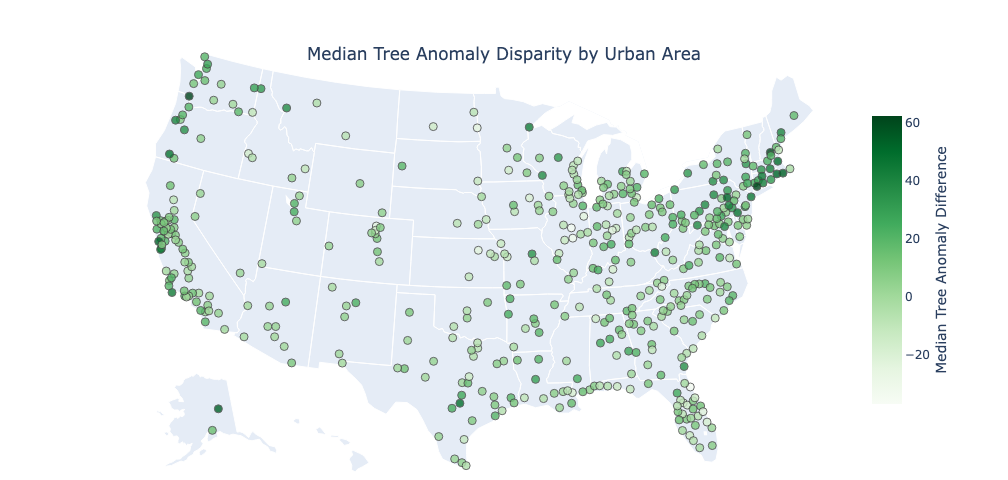

In [67]:
data_col = 'Baseline Tree Anomaly (Difference)'
fig = go.Figure(data=go.Scattergeo(
        lon = result['Lon'],
        lat = result['Lat'],
        text = 'Median Tree Area Difference: ' + result[data_col].round(2).astype(str)+'<br>'+ result['Urban_name'],
        mode = 'markers',
        marker_color = result[data_col],
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Greens',
            cmin = result[data_col].min(),
            color = result[data_col],
            cmax = result[data_col].max(),
            colorbar=dict(
                title=dict(
                    text="Median Tree Anomaly Difference", side='right'
                ),
                x=0.9, len=0.7           
            )
         )
))

fig.update_layout(
        title = 'Median Tree Anomaly Disparity by Urban Area',
        title_x=0.5, title_y=0.90,
        geo_scope='usa',
        width=750,
        height=480,
        margin={'t':40,'l':0,'b':0,'r':50}
)
fig.show()

#### All Three Tree Scenario Differences

In [70]:
from plotly.subplots import make_subplots

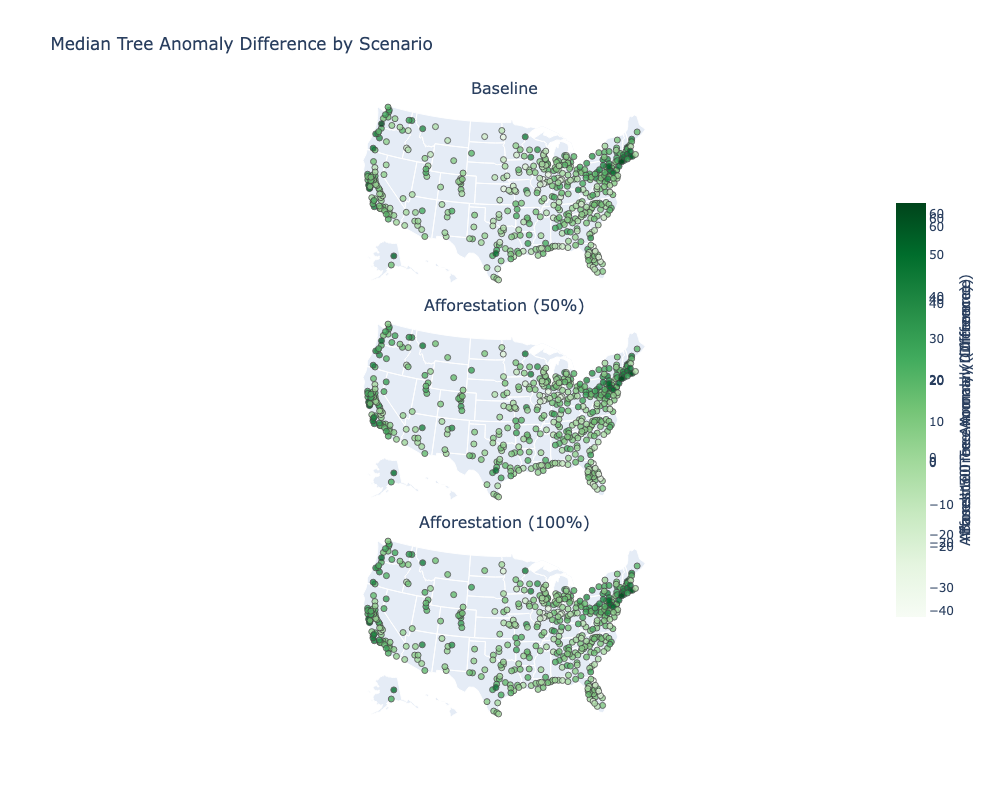

In [81]:
nrows = 3; ncols = 1
data_col = ['Baseline Tree Anomaly (Difference)', 
            'Afforest50 Tree Anomaly (Difference)', 'Afforest100 Tree Anomaly (Difference)']
# Initialize figure with subplots
fig = make_subplots(
    rows=nrows, cols=ncols, specs=[
        #[{"type": "scattergeo"}, {"type": "scattergeo"}, {"type": "scattergeo"}]
        [{"type": "scattergeo"}], [{"type": "scattergeo"}], [{"type": "scattergeo"}]
    ], 
    subplot_titles=('Baseline', 'Afforestation (50%)', 'Afforestation (100%)'),
    #horizontal_spacing=0.005 #, 
    vertical_spacing=0.05
)

fig.add_trace(go.Scattergeo(
    lon = result['Lon'],
    lat = result['Lat'],
    text = data_col[0] + ': ' + result[data_col[0]].round(2).astype(str)+'<br>'+ result['Urban_name'],
    mode = 'markers',
    marker_color = result[data_col[0]],
    marker=dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = False,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Greens',
                    cmin = result[data_col[0]].min(),
                    color = result[data_col[0]],
                    cmax = result[data_col[0]].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col[0], side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Baseline'), 
    row=1, col=1)

fig.add_trace(go.Scattergeo(
    lon = result['Lon'],
    lat = result['Lat'],
    text = data_col[1] + ': ' + result[data_col[1]].round(2).astype(str)+'<br>'+ result['Urban_name'],
    mode = 'markers',
    marker_color = result[data_col[1]],
    marker=dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = False,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Greens',
                    cmin = result[data_col[1]].min(),
                    color = result[data_col[1]],
                    cmax = result[data_col[1]].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col[1], side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Afforestation (50%)'), 
    row=2, col=1)

fig.add_trace(go.Scattergeo(
    lon = result['Lon'],
    lat = result['Lat'],
    text = data_col[2] + ': ' + result[data_col[2]].round(2).astype(str)+'<br>'+ result['Urban_name'],
    mode = 'markers',
    marker_color = result[data_col[1]],
    marker=dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = False,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Greens',
                    cmin = result[data_col[2]].min(),
                    color = result[data_col[2]],
                    cmax = result[data_col[2]].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col[2], side='right'
                        ),
                        x=0.95, len=0.7           
                    )
                 ),
    name='Afforestation (100%)'), 
    row=3, col=1)


fig.update_layout(
    title_text='Median Tree Anomaly Difference by Scenario',
    geo1=dict(scope='usa'), geo2=dict(scope='usa'), geo3=dict(scope='usa'),
    showlegend=False, height=800, width=400
)

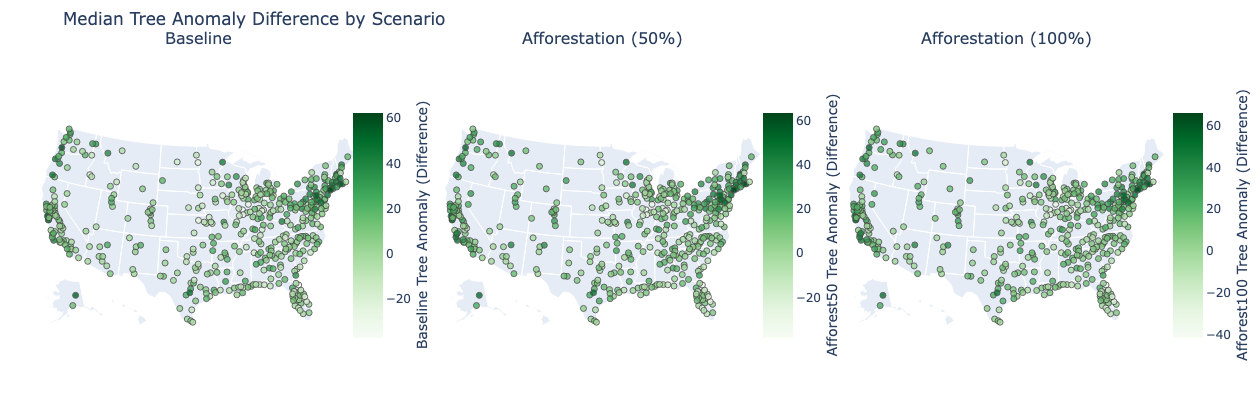

In [119]:
nrows = 1; ncols = 3
data_col = ['Baseline Tree Anomaly (Difference)', 
            'Afforest50 Tree Anomaly (Difference)', 'Afforest100 Tree Anomaly (Difference)']
# Initialize figure with subplots
fig = make_subplots(
    rows=nrows, cols=ncols, specs=[
        [{"type": "scattergeo"}, {"type": "scattergeo"}, {"type": "scattergeo"}]
        #[{"type": "scattergeo"}], [{"type": "scattergeo"}], [{"type": "scattergeo"}]
    ], 
    subplot_titles=('Baseline', 'Afforestation (50%)', 'Afforestation (100%)'),
    horizontal_spacing=0.005, #, 
    vertical_spacing=0.005
)

fig.add_trace(go.Scattergeo(
    lon = result['Lon'],
    lat = result['Lat'],
    text = data_col[0] + ': ' + result[data_col[0]].round(2).astype(str)+'<br>'+ result['Urban_name'],
    mode = 'markers',
    marker_color = result[data_col[0]],
    marker=dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = False,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Greens',
                    cmin = result[data_col[0]].min(),
                    color = result[data_col[0]],
                    cmax = result[data_col[0]].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col[0], side='right'
                        ),
                        x=0.285, len=0.7           
                    )
                 ),
    name='Baseline'), 
    row=1, col=1)

fig.add_trace(go.Scattergeo(
    lon = result['Lon'],
    lat = result['Lat'],
    text = data_col[1] + ': ' + result[data_col[1]].round(2).astype(str)+'<br>'+ result['Urban_name'],
    mode = 'markers',
    marker_color = result[data_col[1]],
    marker=dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = False,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Greens',
                    cmin = result[data_col[1]].min(),
                    color = result[data_col[1]],
                    cmax = result[data_col[1]].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col[1], side='right'
                        ),
                        x=0.625, len=0.7           
                    )
                 ),
    name='Afforestation (50%)'), 
    row=1, col=2)

fig.add_trace(go.Scattergeo(
    lon = result['Lon'],
    lat = result['Lat'],
    text = data_col[2] + ': ' + result[data_col[2]].round(2).astype(str)+'<br>'+ result['Urban_name'],
    mode = 'markers',
    marker_color = result[data_col[1]],
    marker=dict(
                    size = 6,
                    opacity = 0.8,
                    reversescale = False,
                    autocolorscale = False,
                    symbol = 'circle',
                    line = dict(
                        width=1,
                        color='rgba(102, 102, 102)'
                    ),
                    colorscale = 'Greens',
                    cmin = result[data_col[2]].min(),
                    color = result[data_col[2]],
                    cmax = result[data_col[2]].max(),
                    colorbar=dict(
                        title=dict(
                            text=data_col[2], side='right'
                        ),
                        x=0.965, len=0.7,  
                        #orientation='h'
                    )
                 ),
    name='Afforestation (100%)'), 
    row=1, col=3)


fig.update_layout(
    title_text='Median Tree Anomaly Difference by Scenario',
    geo1=dict(scope='usa'), geo2=dict(scope='usa'), geo3=dict(scope='usa'),
    showlegend=False, height=400, width=1200,
    margin={'t':50,'l':0,'b':0,'r':50}
)